In [1]:
import pandas as pd
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics import tsaplots as tsp
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [104]:
os.chdir("/Users/cseveriano/spatio-temporal-forecasting/")

fln_df = pd.read_csv('data/processed/SONDA/FLN-15min.csv', sep=";")

joi_df = pd.read_csv('data/processed/SONDA/JOI-15min.csv', sep=";")

sbr_df = pd.read_csv('data/processed/SONDA/SBR-15min.csv', sep=";")

In [126]:
df = joi_df


In [127]:
df.date = pd.to_datetime(df.date)
df['date_minus_year'] = df["date"].apply( lambda df : datetime.datetime(year=1900,month=df.month, day=df.day,hour=df.hour, minute=df.minute))	

clear_sky = df.groupby(['date_minus_year'])['glo_avg'].max()

In [128]:
clear_sky.shape[0]
mat = clear_sky.values.reshape(int(clear_sky.shape[0] / 96), 96)

In [129]:
window = 6

for i in np.arange(mat.shape[0]):    
    mva = pd.rolling_mean(mat[i,:], window)
    mva[0:window-1] = mva[window]
    mat[i,:] = mva
    
for j in np.arange(mat.shape[1]):
    mva = pd.rolling_mean(mat[:,j], window)
    mva[0:window-1] = mva[window]
    mat[:,j] = mva

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  after removing the cwd from sys.path.
/Users/cseveriano/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':


In [6]:
#cs_hour = clear_sky.resample('1H').mean()

In [8]:
#mat = cs_hour.values.reshape(int(cs_hour.shape[0] / 24), 24)
#mat.shape

(365, 24)

In [130]:
x, y = np.mgrid[0:364:365j,0:95:96j]
z = mat

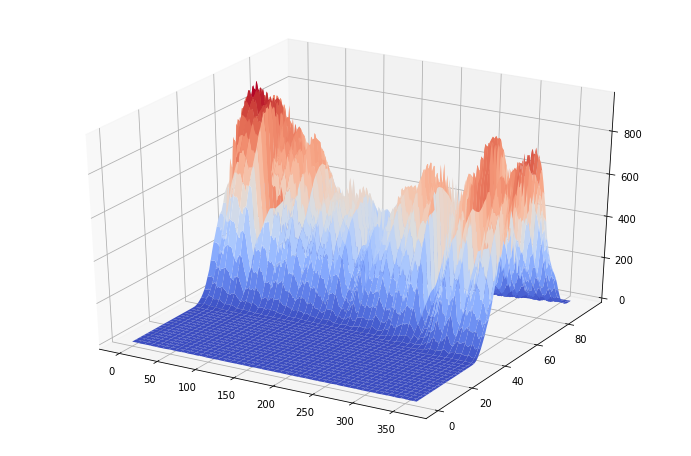

In [131]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm)
plt.show()

In [132]:

clear_sky_df = pd.DataFrame({'date': clear_sky.index,
                             'glo_avg': mat.reshape(clear_sky.shape)})


In [133]:
clear_sky_df.set_index('date')

,glo_avg
date,
1900-01-01 00:00:00,1.171665
1900-01-01 00:15:00,1.171665
1900-01-01 00:30:00,1.171665
1900-01-01 00:45:00,1.171665
1900-01-01 01:00:00,1.171665
1900-01-01 01:15:00,1.180237
1900-01-01 01:30:00,1.171665
1900-01-01 01:45:00,1.160444
1900-01-01 02:00:00,1.150944


In [134]:
#clear_sky_df.describe()

clear_sky_df.to_csv("data/processed/SONDA/ClearSky/JOI_CSK_6_15min.csv", header=True, index=False, sep = ';', na_rep='NaN')